In [1]:
# imports
import market_status as ms
from IPython.display import display, Markdown, Javascript, display_html
import pandas as pd
import datetime as dt
import os
import time

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- IPOs from last week (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Screener for sector performers

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/12/2021</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>17/01/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>21/02/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>15/04/2022</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

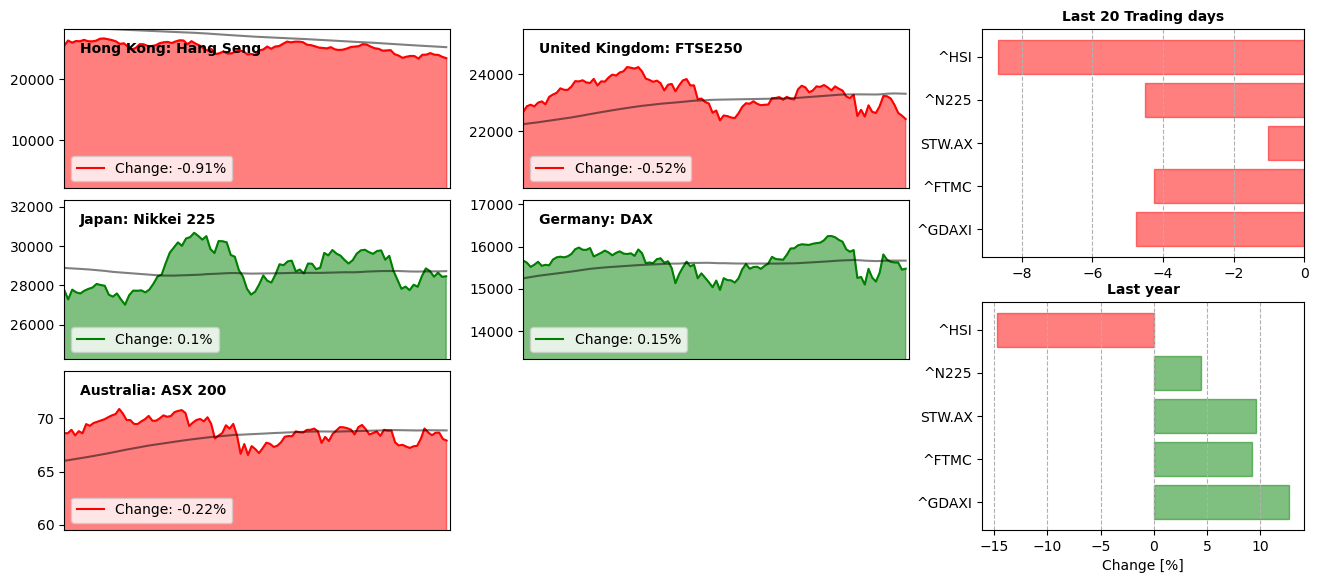

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000 

Last update done: 16-12-2021 at 09:09:58


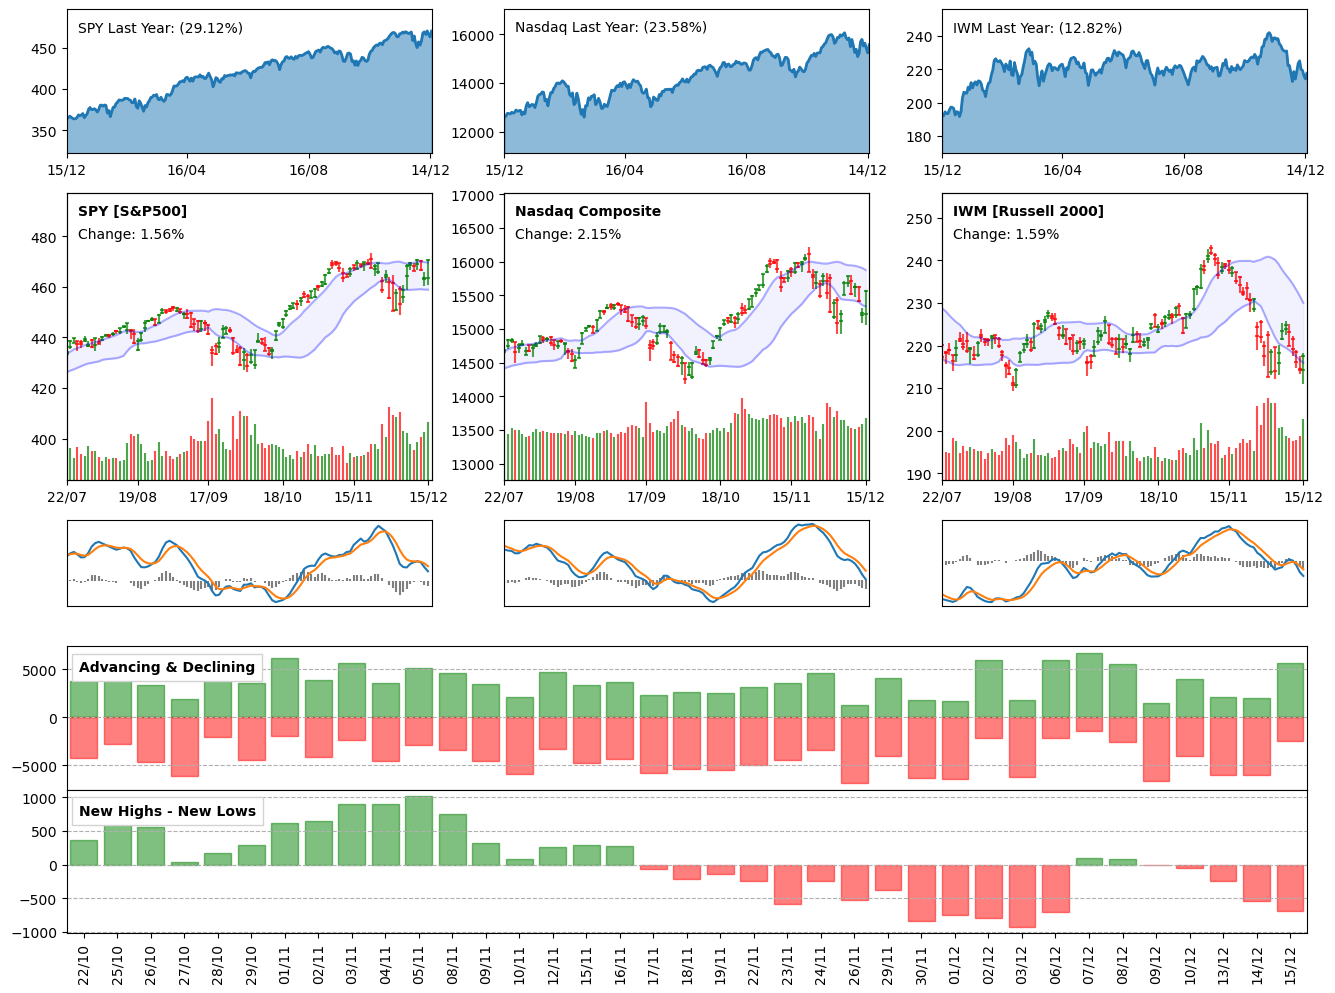

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

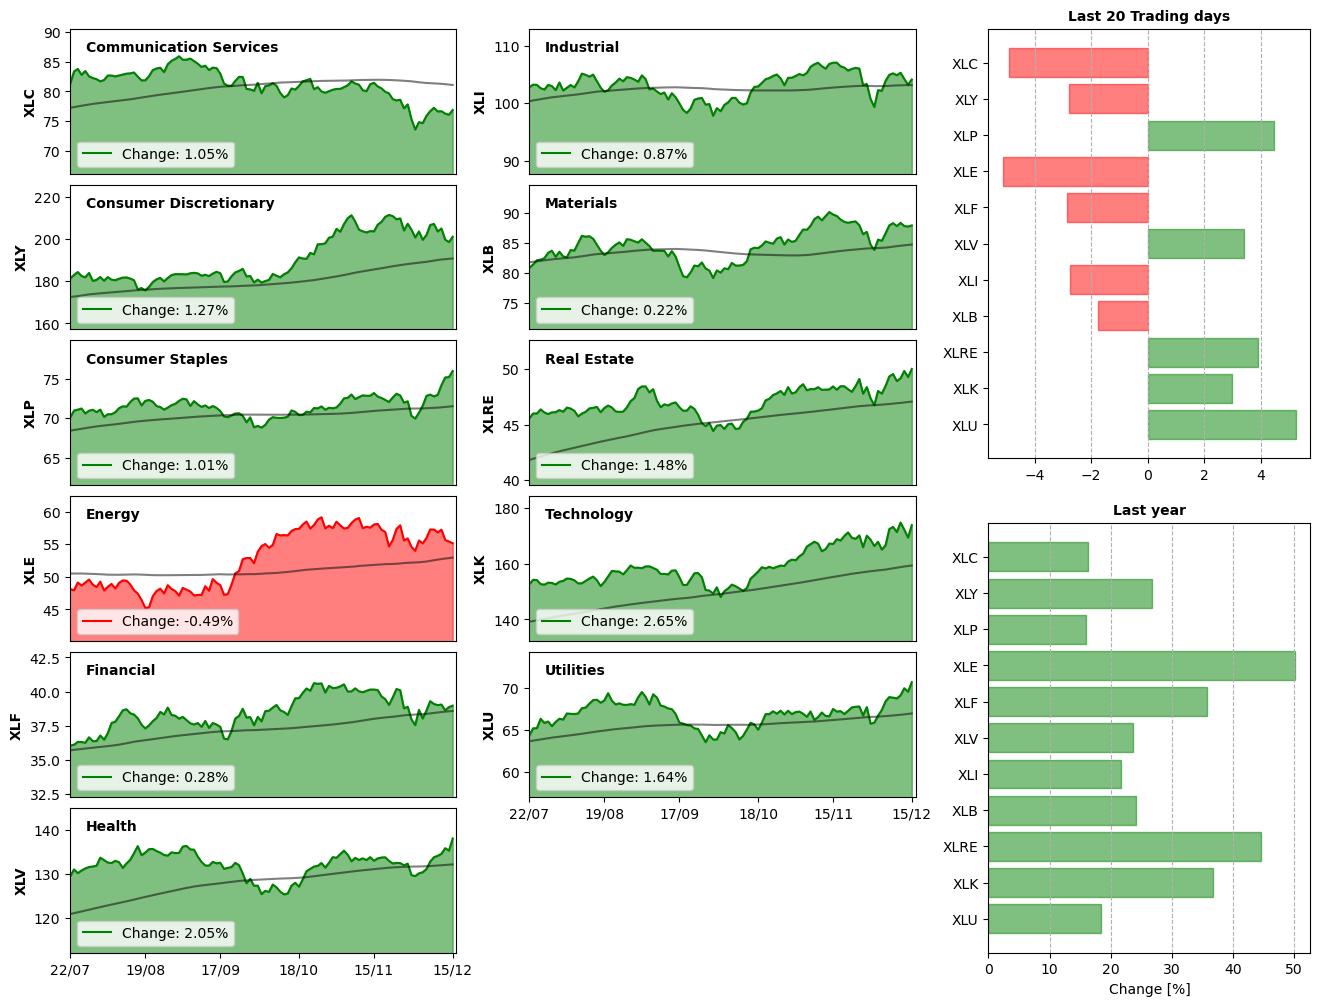

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month

In [10]:
ind = ms.industries()
tab = ind.scrap()
display_html(ind.prettify(tab.iloc[:20,:])._repr_html_(), raw=True)

,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change
Consumer Electronics,2.15,18.14,35.04,39.41,1.24,2.85
Utilities - Independent Power Producers,7.06,17.58,27.36,40.12,1.05,2.37
Home Improvement Retail,-0.60,9.22,34.04,51.76,1.93,1.57
Residential Construction,-0.77,8.38,18.74,48.63,1.48,2.00
Other Industrial Metals & Mining,0.29,6.94,-15.14,-4.58,0.70,0.23
REIT - Industrial,2.05,6.93,26.30,59.90,1.47,2.16
Healthcare Plans,6.01,6.64,14.39,34.03,1.22,2.31
Household & Personal Products,2.73,4.54,7.49,10.39,1.16,0.69
Utilities - Regulated Water,1.59,4.50,9.84,14.18,1.19,1.45
Confectioners,5.52,4.47,4.74,16.84,1.55,1.87


In [11]:
display_html(ind.prettify(tab.iloc[-10:,:])._repr_html_(), raw=True)

,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change
Oil & Gas Drilling,-1.67,-14.64,-13.06,23.33,0.73,2.84
Travel Services,-7.89,-14.67,-17.97,-3.96,1.27,-0.54
Health Information Services,-5.59,-16.12,-22.68,-19.02,1.15,1.15
Department Stores,-4.99,-21.53,3.51,53.22,1.02,-0.50
Uranium,-6.09,-21.57,14.59,75.71,0.94,5.71
Gambling,-11.43,-21.58,-25.71,-22.51,1.12,1.88
Solar,-9.40,-22.25,3.64,-8.78,1.27,1.18
Other Precious Metals & Mining,-11.25,-23.46,-38.18,-37.17,1.49,-2.07
Electronic Gaming & Multimedia,-10.90,-23.94,-22.02,-2.04,1.30,-1.00
Silver,-9.58,-24.23,-32.73,-23.09,1.58,-0.75


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [5]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

,Day [%],Week [%],Month [%],Quarter [%]
Natural Gas,3.21,-0.03,-24.20,-26.45
Crude Oil WTI,0.78,-0.35,-11.57,-1.64
Crude Oil Brent,0.93,-0.77,-9.54,-1.45
Ethanol,3.88,3.88,-10.48,-4.72
Palladium,6.28,-5.76,-23.93,-18.43
Copper,1.69,-0.78,-2.26,-0.67
Platinum,2.44,-1.95,-14.75,-0.79
Silver,2.90,-0.11,-11.12,-2.74
Gold,1.17,0.02,-3.72,1.62
Lumber,0.14,3.52,73.77,85.75


***
## **Crypto**

In [6]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **Finviz screeners**
Following tables are results from pre-defined finviz screeners
<br><br>
**New high Breakouts** - [[Link]](https://finviz.com/screener.ashx?v=211&s=ta_newhigh&f=ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1)
<br>
Stocks with new 52 week highs, with float over 5M shares, average volume 100k and relative volume over 1. 

In [7]:
screeners = ms.screeners()
nh = screeners.newhighs()
screeners.prettify(nh)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ITMR,GCP,UVE,CSGS,TNDM,PFE,GOOD,CWT,TWNK,LSI,ANET,CHD,AMPH,CNC,DOGZ
ROIC,FTS,ABBV,KO,HBNC,AVB,CPT,GIS,CLBK,UNH,COST,EQR,PEP,PSA,ARE
SBAC,BRK-B,PLD,WTRG,EGP,PG,OGE,DGX,CTSH,DRE,ACGL,GSK,MAA,ORLY,NFG


**50 day high with fundamentals** - [[Link]](https://finviz.com/screener.ashx?v=211&f=fa_debteq_u1,fa_eps5years_o10,fa_sales5years_o10,ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1,ta_highlow50d_nh)
<br>
Stocks which have 50 day highs with higher relative volume and basic fundamental filtration (dept/equity <1, sales and EPS growth in last 5 years larger than 10%)

In [8]:
fd = screeners.fiftyday()
screeners.prettify(fd)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
PGR,IIVI,CHD,UNH,ATO,COST,NOK,KNSL,DEA,QNST,,,,,


In [9]:
# save the screener results into xlsx
with pd.ExcelWriter("Screeners/NH"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    nh.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))
with pd.ExcelWriter("Screeners/FD"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    fd.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
## **Other resources**

List of other good resources to check (these will be hopefully implemented into this notebook later)

1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish


In [12]:
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0